In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulate 1,000 fintech users
n = 1000
data = pd.DataFrame({
    "user_id": range(1, n+1),
    "age": np.random.randint(20, 60, n),
    "deposit_amount": np.random.normal(5000, 2000, n).round(2),
    "monthly_trades": np.random.poisson(5, n),
    "churned": np.random.choice([0, 1], n, p=[0.75, 0.25])
})

data.head()

Matplotlib is building the font cache; this may take a moment.


,user_id,age,deposit_amount,monthly_trades,churned
0,1,58,3745.16,8,0
1,2,48,4009.22,3,0
2,3,34,5837.68,6,1
3,4,27,4221.42,5,1
4,5,40,2530.11,3,1


In [4]:
total_users = len(data)
churn_rate = data["churned"].mean()
avg_deposit = data["deposit_amount"].mean()

print(f"Total Users: {total_users}")
print(f"Churn Rate: {churn_rate:.2%}")
print(f"Average Deposit Amount: ${avg_deposit:.2f}")

Total Users: 1000
Churn Rate: 25.90%
Average Deposit Amount: $5021.99


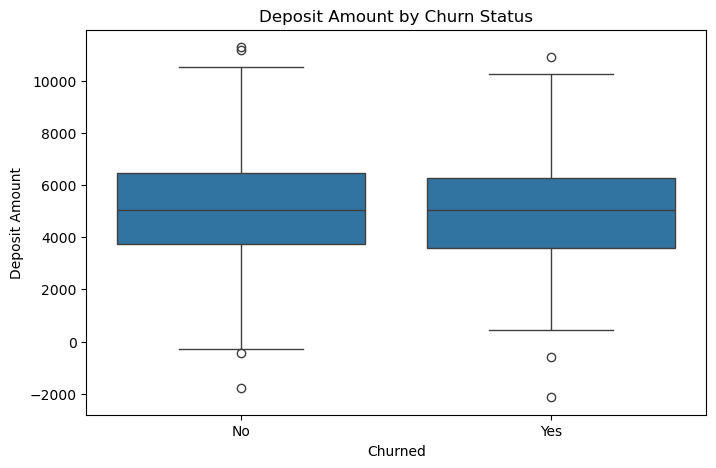

In [5]:
# Deposit vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="churned", y="deposit_amount", data=data)
plt.title("Deposit Amount by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Deposit Amount")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

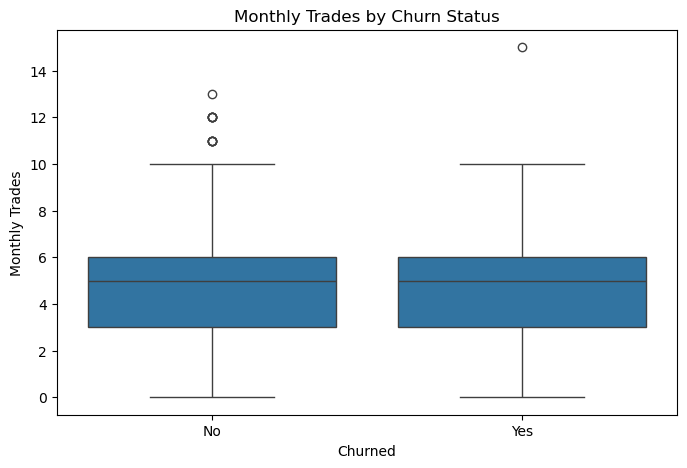

In [6]:
# Monthly Trades vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="churned", y="monthly_trades", data=data)
plt.title("Monthly Trades by Churn Status")
plt.xlabel("Churned")
plt.ylabel("Monthly Trades")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

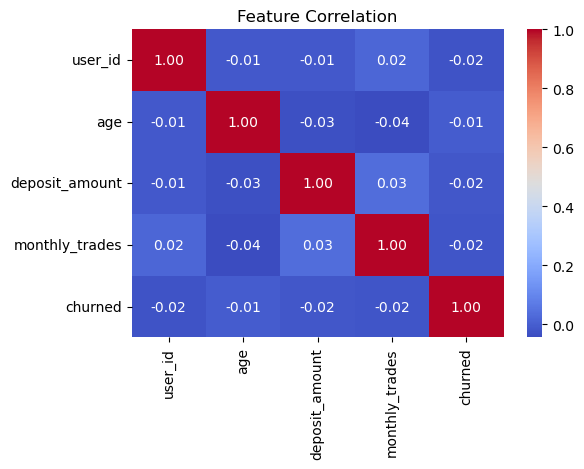

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


In [8]:
# Simple Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = data[["age", "deposit_amount", "monthly_trades"]]
y = data["churned"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       230
           1       0.00      0.00      0.00        70

    accuracy                           0.77       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.59      0.77      0.67       300



/Users/nathaniasantoso/anaconda3/envs/fintech/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nathaniasantoso/anaconda3/envs/fintech/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/nathaniasantoso/anaconda3/envs/fintech/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

### Key Insights

1. Users with **lower deposit amounts** churn more frequently.  
2. Users with **fewer monthly trades** are more likely to leave.  
3. Age seems **less correlated**, indicating product engagement drives retention.  
4. A simple logistic regression can predict churn with reasonable accuracy, showing predictive analysis skills.

**Business Recommendation:**  
- Focus retention campaigns on low-deposit, low-activity users  
- Incentivize engagement to reduce churn
